<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week07/knn_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:
# Load the data
col_names = ['Sex',
             'Length',
             'Diameter',
             'Height',
             'Whole weight',
             'Schucked weight',
             'Viscera weight',
             'Shell weight',
             'Rings']
path = '/content/drive/MyDrive/Coding Dojo/07 Week 3: Classification Models/abalone.data'
df = pd.read_csv(path, names = col_names)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Schucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
# Explore the data
print('Duplicates:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())
print()

df.info()

print()
df['Sex'].value_counts()

Duplicates: 0
Missing Values: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4177 non-null   object 
 1   Length           4177 non-null   float64
 2   Diameter         4177 non-null   float64
 3   Height           4177 non-null   float64
 4   Whole weight     4177 non-null   float64
 5   Schucked weight  4177 non-null   float64
 6   Viscera weight   4177 non-null   float64
 7   Shell weight     4177 non-null   float64
 8   Rings            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB



M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [16]:
# Set the features and target
X = df.drop(columns = 'Sex')
y = df['Sex']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [26]:
# Check the balance of the data sat
n = df.shape[0]
m = (df['Sex'] == 'M').sum()
f = (df['Sex'] == 'F').sum()
i = (df['Sex'] == 'I').sum()

print('Ratio of males:', round(m / n, 2))
print('Ratio of females:', round(f / n, 2))
print('Ratio of infants:', round(i / n, 2))

Ratio of males: 0.37
Ratio of females: 0.31
Ratio of infants: 0.32


> This is not a perfectly balanced data set. There is a higher proportion of males in the data set. 

In [33]:
# Construct a k nearest neighbors model
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
# Train the model on the training set
knn_pipeline.fit(X_train, y_train)
# Check the accuray of the knn model
print(knn_pipeline.score(X_test, y_test))

0.5473684210526316


> An accuracy of 54.7% is not very good. We will now tune the model by _k_ to try and improve the accuracy.

In [54]:
# Tune the model by the number of neighbors
k = list(range(1,1000))
scores = pd.DataFrame(index = k, columns = ['Accuracy'])
for i in k:
  knc = KNeighborsClassifier(n_neighbors = i)
  knn_pipeline = make_pipeline(StandardScaler(), knc)
  knn_pipeline.fit(X_train, y_train)
  scores.loc[i, 'Accuracy'] = knn_pipeline.score(X_test, y_test)

In [56]:
# Deterimine the optimal value for k
scores.sort_values(by = 'Accuracy', ascending = False).head()

,Accuracy
102,0.585646
123,0.584689
117,0.583732
118,0.582775
119,0.582775


> We let _k_ vary from 1 to 1000 and determined that a value of 102 for _k_ produced the highest accuracy. This accuracy was only 58.6%. We only gained 4 percentage points for our trouble. 

In [59]:
# Construct the final model
final_model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 102))
final_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=102))])

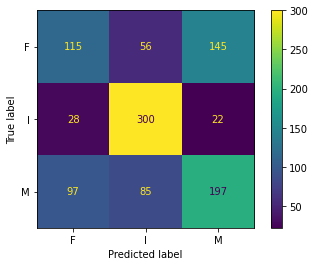

In [62]:
# Construct a confusion matrix
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test)